# Resources:

### OpenCV Method Documentation
Here I have tried listing the modules in the order I use them through out the notebook 
* [medianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)
* [adaptiveThreshold](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)
* [Canny](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)
* [Dilate](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)
* [approxPolyDP](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c)
* [arcLength](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c)
* [contourArea](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga2c759ed9f497d4a618048a2f56dc97f1)
* [findContours](https://docs.opencv.org/4.5.4/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0)
* [drawContours](https://docs.opencv.org/4.5.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)
* [isContourConvex](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga8abf8010377b58cbc16db6734d92941b)
* [getPerspectiveTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga20f62aa3235d869c9956436c870893ae)
* [warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87)

### Online Resources 
* [Contours and Convexity](https://medium.com/analytics-vidhya/contours-and-convex-hull-in-opencv-python-d7503f6651bc) 
* [Android Rectangle Solution](https://stackoverflow.com/questions/8667818/opencv-c-obj-c-detecting-a-sheet-of-paper-square-detection)

# Description
Insert description here

In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

Here we are simply getting started and displayed the images that we will be using in grayscale. 

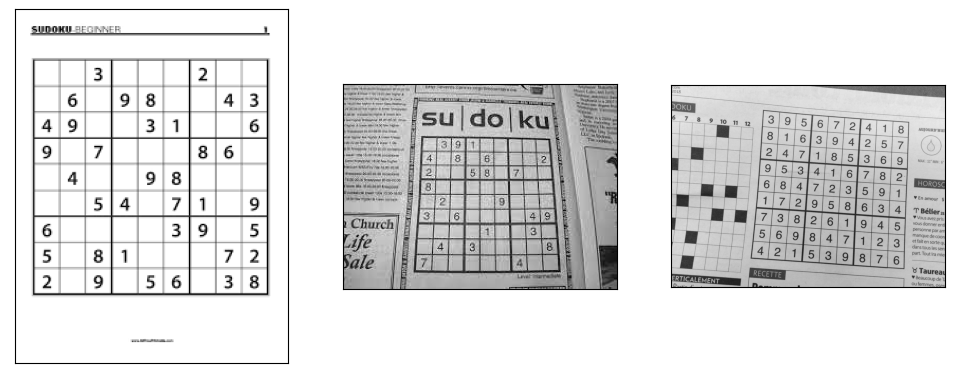

In [2]:
image_paths = ['./sudoku.png', './sudoku_newspaper.jpeg', './sudoku_newspaper2.jpg']
images = [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) for img_path in image_paths]
gray_images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in image_paths]

fig = plt.figure(figsize=(12,8))
for i, img in enumerate(gray_images):
    plt.subplot(1,3,i+1)
    plt.imshow(img, 'gray')
    plt.xticks([]),plt.yticks([])

## Process for Finding Rectangles in the Image
This section will walk step-by-step at image processing is being done and why it is being done. At the end, all the code will be put together into a single function. 

1.) Here we are first applying a median blur to the image. This will help if the image is grainy and can be particulary useful considering that we wish to work with black and white images. 

1.) First we will add contrast to the image

In [3]:
img_options = {
        'contrast': 1.5,
        'brightness': 0.0,
        'blur_radius': 3,
        'canny': (250, 200),
        'kernel': np.ones((3,3), np.uint8),
        'anchor': [-1,1],
        'chosen_contour': 0
    }

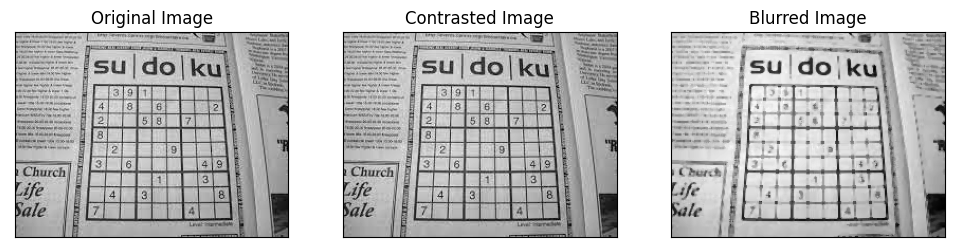

In [4]:
# choose an image to work with
chosen_img = 1
img = gray_images[chosen_img]
# contr_img = cv2.addWeighted(img, img_options['contrast'], img, 0, img_options['brightness'])
contr_img = img
blur_img = cv2.medianBlur(contr_img, img_options['blur_radius'])
# display results
fig = plt.figure(figsize=(12,8))
plt.subplot(1,3,1),plt.imshow(img,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(contr_img,'gray')
plt.title('Contrasted Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(blur_img,'gray')
plt.title('Blurred Image')
plt.xticks([]),plt.yticks([])
plt.show()

2.) Now we will be applying the Canny edge detector to detect all black lines in the image. 

Shape gray: (194, 259), dtype: uint8


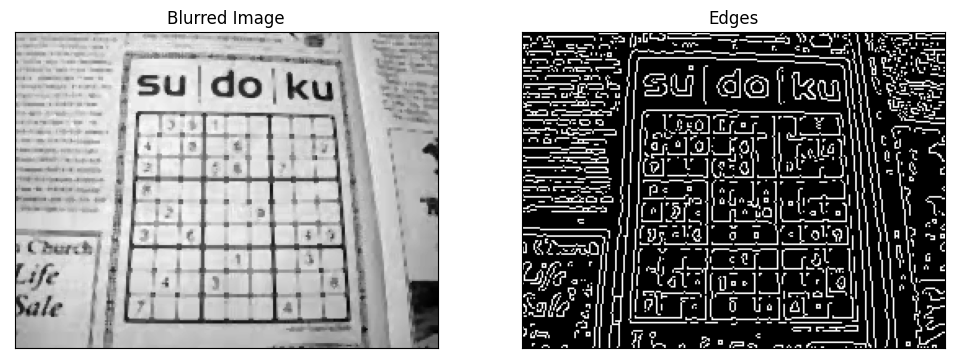

In [5]:
gray = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
gray = cv2.Canny(gray, *img_options['canny'])
print(f"Shape gray: {gray.shape}, dtype: {gray.dtype}")
# display results
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(blur_img,'gray')
plt.title('Blurred Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gray,'gray')
plt.title('Edges')
plt.xticks([]),plt.yticks([])
plt.show()

3.) Next we will apply dilation to fill in any holes in any line segments. 

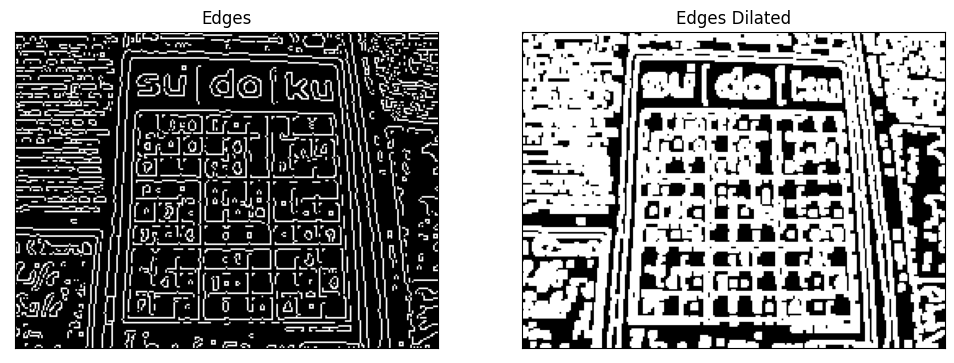

In [6]:
gray_dilate = cv2.dilate(gray, img_options['kernel'], np.zeros(gray.shape, dtype=np.uint8), img_options['anchor'])
# gray_dilate = gray

# display results
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(gray,'gray')
plt.title('Edges')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gray_dilate,'gray')
plt.title('Edges Dilated')
plt.xticks([]),plt.yticks([])
plt.show()

4.) The next step is to find all the contours in the image. Afterwards, we will display the first four contours. 

Area of largest contour: 17546.5      
Area of image: 50246      
Fractional Area: 0.349211877562393      
Largest Area Index: 53      
Number of Contours: 373


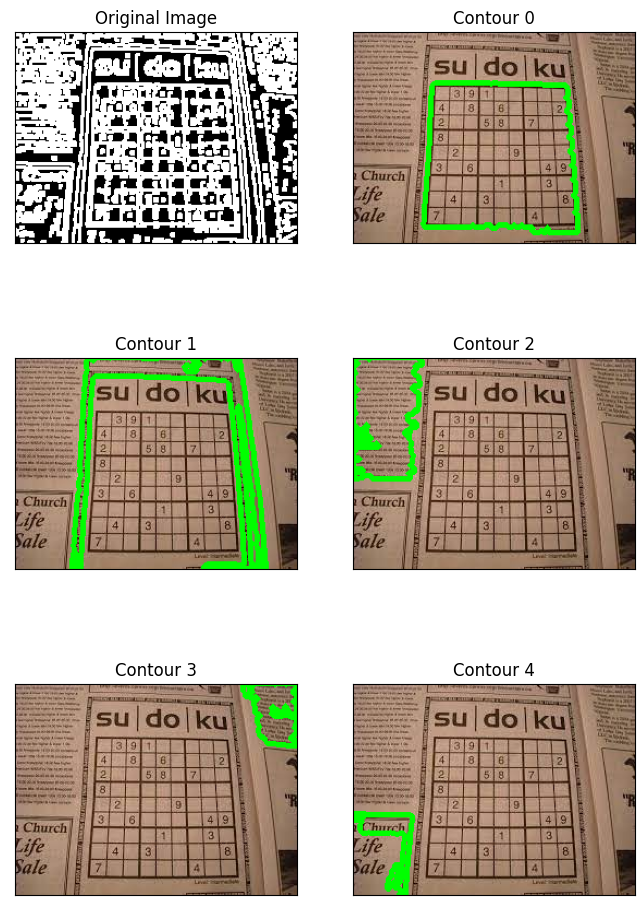

In [7]:
contours, _ = cv2.findContours(gray_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# display results 
num_contours_display = 5
total_imgs = num_contours_display + 1
rows = total_imgs // 2
results = [gray_dilate]
titles = ['Original Image']

# sort by the largest contour
contour_areas = np.array([cv2.contourArea(cont) for cont in contours])
area_indices = np.flip(np.argsort(contour_areas))

# Just to analyze the area of the largest contour
largest_area = contour_areas[area_indices[0]]
total_area = images[chosen_img].shape[0] * images[chosen_img].shape[1]
print(f"Area of largest contour: {largest_area}\
      \nArea of image: {total_area}\
      \nFractional Area: {largest_area/total_area}\
      \nLargest Area Index: {area_indices[0]}\
      \nNumber of Contours: {len(contour_areas)}")

# filter out contours whose area is nearly the entire image
# which would indicate that there is a border around the image
l_i = 0
area_threshold = 0.98
for i, area_idx in enumerate(area_indices):
    curr_area = contour_areas[area_idx]
    if curr_area / total_area < area_threshold:
        l_i = i
        break
area_indices = area_indices[l_i:]

fig = plt.figure(figsize=(8,12))
for i in range(num_contours_display):
    # cnt = contours[i]
    cnt = contours[area_indices[i]]
    img_copy = copy(images[chosen_img])
    results.append(cv2.drawContours(img_copy, [cnt], 0, (0,255,0), 3))
    titles.append(f'Contour {i}')

for i in range(total_imgs):
    if i == 0:
        plt.subplot(rows,2,i+1),plt.imshow(results[i], 'gray')
    else: 
        plt.subplot(rows,2,i+1),plt.imshow(results[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5.) Next we wish to convert our contours into simpler shapes. 

Perimeter: 12.035634891986847


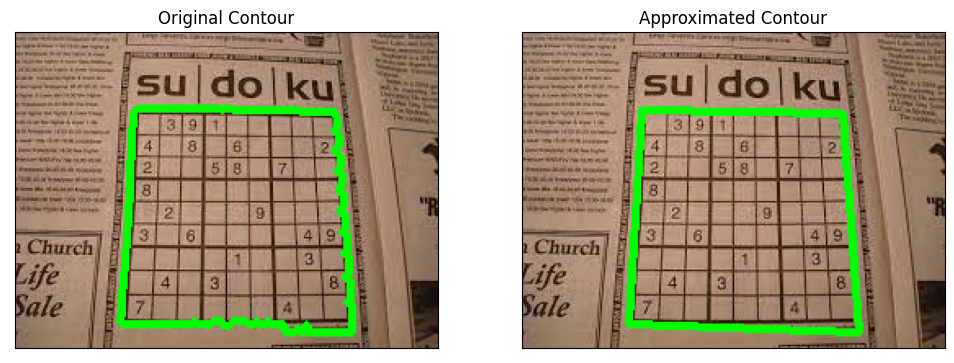

In [8]:
chosen_contour = img_options['chosen_contour']
perimeter = cv2.arcLength(contours[area_indices[chosen_contour]], True)*0.02
print(f"Perimeter: {perimeter}")
approx = cv2.approxPolyDP(contours[area_indices[chosen_contour]], perimeter, True)

# display results
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(results[chosen_contour + 1])
plt.title('Original Contour')
plt.xticks([]),plt.yticks([])
img_copy = copy(images[chosen_img])
approx_img = cv2.drawContours(img_copy, [approx], 0, (0,255,0), 3)
plt.subplot(1,2,2),plt.imshow(approx_img)
plt.title('Approximated Contour')
plt.xticks([]),plt.yticks([])
plt.show()

6.) Next we check that the approximation is only estimated using 4 points, that the area is above some threshold which should be tuned depending on the quality of the picture taken, and we check that the contour is convex as a rectangle would be. 

Printing these points also gives more insight into the type of result that approxPolyDP returns. Since we are concerned with 4 points, they are listed in a continuous fashion so that each point is connected by a line segment. Since we specified that the contours should be closed, the last point will connect back to the first point. 

In [9]:
contourArea = cv2.contourArea(approx)
if (len(approx) == 4 and abs(contourArea) > 2000 and cv2.isContourConvex(approx)):
    print(f"This is a valid contour; Area of contour is {contourArea}; Shape of approx is {approx.shape}")
    for i in range(len(approx)):
        point = np.squeeze(approx[i])
        print(f"Point_{i}: ({point[0]},{point[1]})")

This is a valid contour; Area of contour is 17486.5; Shape of approx is (4, 1, 2)
Point_0: (73,48)
Point_1: (65,179)
Point_2: (206,184)
Point_3: (196,50)


7.) This step will now perform a homography transformation so that we have a centered square that takes of most of the image of the sudoku puzzle. 

Orientation: landscape, Square Size: 174, Image dimensions: (194, 259, 3)
Target (x,y) coordinates:
[[  0.   0.]
 [  0. 174.]
 [174. 174.]
 [174.   0.]]


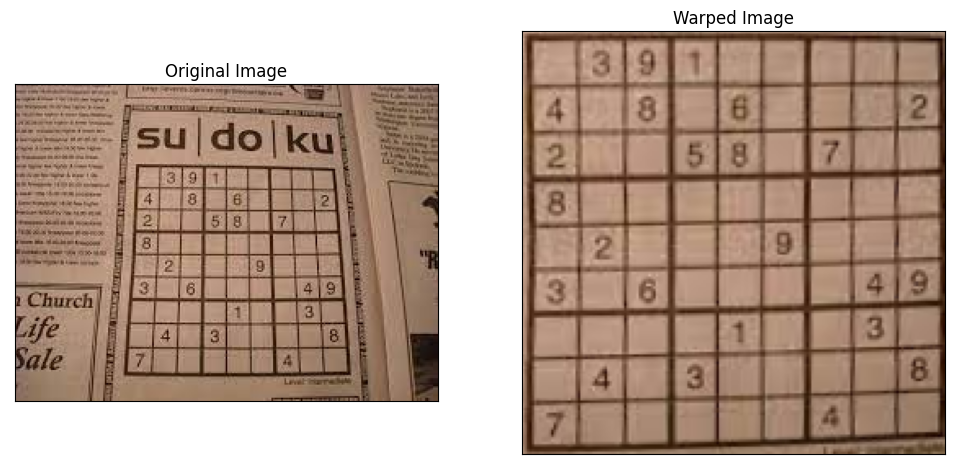

In [10]:
if images[chosen_img].shape[0] < images[chosen_img].shape[1]:
    orientation = 'landscape'
    square_size = int(images[chosen_img].shape[0] * 0.90)
else:
    orientation = 'portrait'
    square_size = int(images[chosen_img].shape[1] * 0.90)

# get the perspective transform matrix
target_coordinates = np.array([[0, 0], [0, square_size], [square_size, square_size], [square_size, 0]], dtype=np.float32)
transformation_matrix = cv2.getPerspectiveTransform(np.squeeze(approx).astype(np.float32), target_coordinates)

# Apply the perspective transformation
result_img = cv2.warpPerspective(images[chosen_img], transformation_matrix, (int(square_size), int(square_size)))

print(f"Orientation: {orientation}, Square Size: {square_size}, Image dimensions: {images[chosen_img].shape}")
print(f"Target (x,y) coordinates:\n{target_coordinates}")

# display results
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(images[chosen_img],'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_img,'gray')
plt.title('Warped Image')
plt.xticks([]),plt.yticks([])
plt.show()

8.) Naive split of each cell

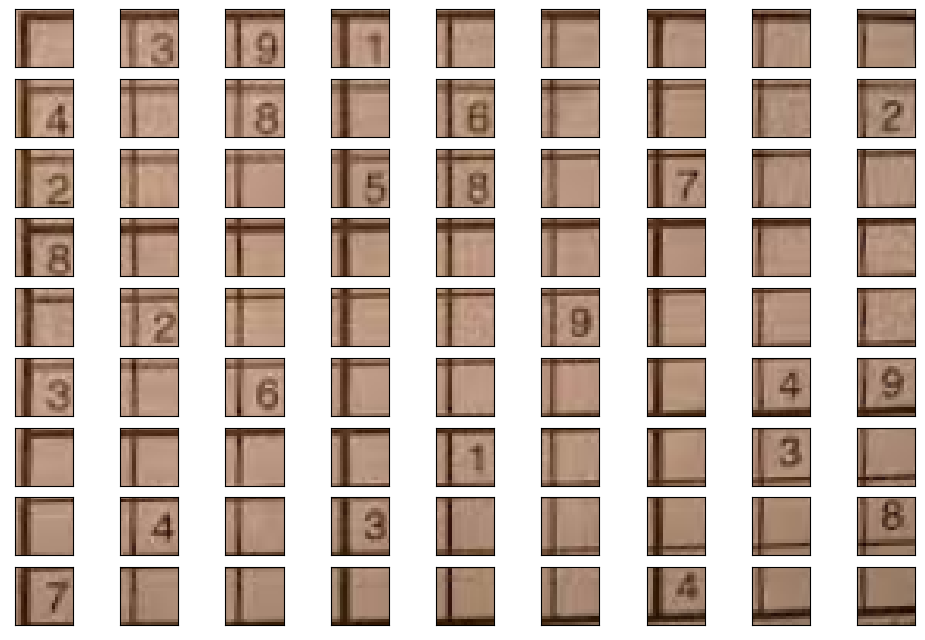

In [11]:
cells = []
step_x = result_img.shape[1] // 9
step_y = result_img.shape[0] // 9
for i in range(9):
    for j in range(9):
        curr_cell = copy(result_img[i*step_y: (i+1)*step_y, j*step_x: (j+1)*step_x, :])
        cells.append(curr_cell)

fig = plt.figure(figsize=(12,8))
for i in range(9**2):
    plt.subplot(9,9,i+1)
    plt.imshow(cells[i], 'gray')
    # plt.title('Blurred Image')
    plt.xticks([]),plt.yticks([])
plt.show()

Wrapping it all together into a single function except the naive split. 

In [12]:
def detectSudokuPuzzle(image_path, silent=True):
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    colored_image = copy(original_image)
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img_width = gray_image.shape[1]
    img_height = gray_image.shape[0]

    if not silent:
        print(f"Shape of image: {img_width}, {img_height}")

    modified_image = cv2.medianBlur(gray_image, 3)
    modified_image = cv2.adaptiveThreshold(modified_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    modified_image = cv2.Canny(modified_image, 250, 200)
    modified_image = cv2.dilate(modified_image, np.ones((3,3), np.uint8), np.zeros(gray_image.shape), [-1,1])

    contours, _ = cv2.findContours(modified_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # sort by the largest contour
    contour_areas = np.array([cv2.contourArea(cont) for cont in contours])
    area_indices = np.flip(np.argsort(contour_areas))

    # Just to analyze the area of the largest contour
    largest_area = contour_areas[area_indices[0]]
    total_area = img_width * img_height

    # filter out contours whose area is nearly the entire image
    # which would indicate that there is a border around the image
    l_i = 0
    area_threshold = 0.98
    for i, area_idx in enumerate(area_indices):
        curr_area = contour_areas[area_idx]
        if curr_area / total_area < area_threshold:
            l_i = i
            break
    area_indices = area_indices[l_i:]
    perimeter = cv2.arcLength(contours[area_indices[0]], True)*0.02
    approx = cv2.approxPolyDP(contours[area_indices[0]], perimeter, True)

    contourArea = cv2.contourArea(approx)
    if not silent:
        if (len(approx) == 4 and abs(contourArea) > 2000 and cv2.isContourConvex(approx)):
            print(f"This is a valid contour; Area of contour is {contourArea}; Shape of approx is {approx.shape}")
            for i in range(len(approx)):
                point = np.squeeze(approx[i])
                print(f"Point_{i}: ({point[0]},{point[1]})")

    if img_height < img_width:
        orientation = 'landscape'
        square_size = int(img_height * 0.90)
    else:
        orientation = 'portrait'
        square_size = int(img_width * 0.90)

    # get the perspective transform matrix
    target_coordinates = np.array([[0, 0], [0, square_size], [square_size, square_size], [square_size, 0]], dtype=np.float32)
    transformation_matrix = cv2.getPerspectiveTransform(np.squeeze(approx).astype(np.float32), target_coordinates)

    # Apply the perspective transformation
    result_img = cv2.warpPerspective(colored_image, transformation_matrix, (int(square_size), int(square_size)))

    if not silent:
        print(f"Orientation: {orientation}, Square Size: {square_size}, Image dimensions: {original_image.shape}")
        print(f"Target (x,y) coordinates:\n{target_coordinates}")

    # display results
    fig = plt.figure(figsize=(12,8))
    plt.subplot(1,2,1),plt.imshow(colored_image,'gray')
    plt.title('Original Image')
    plt.xticks([]),plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_img,'gray')
    plt.title('Warped Image')
    plt.xticks([]),plt.yticks([])
    plt.show()

    return result_img


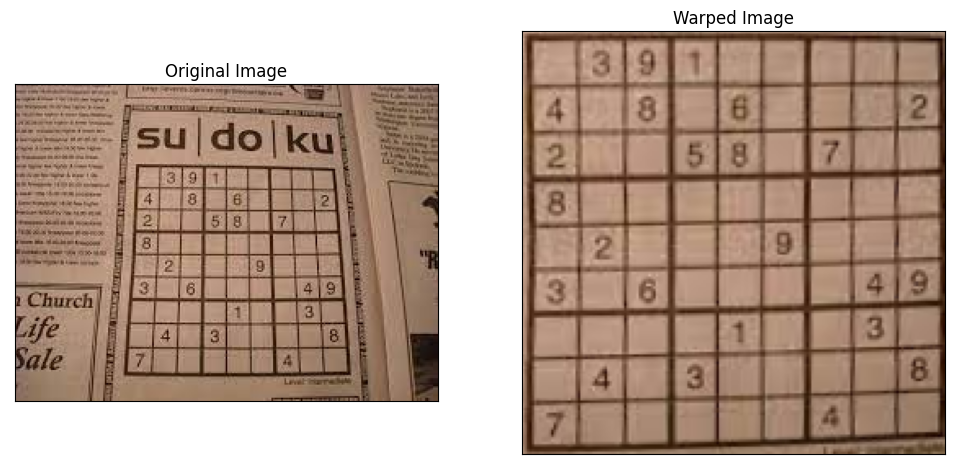

In [14]:
# test the function 
result = detectSudokuPuzzle('./sudoku_newspaper.jpeg')